## S14a: Final Project - NBF - Farmer Prediction


### 1.Reading in our data

In [159]:
# Imports

import numpy as np
import pandas as pd

In [160]:
# Read in data with pandas

data = pd.read_csv('../data/tanzania_NFB.csv')
# Preview

data.head()

Domain_Code             Domain  Area_Code                         Area  \
0         FBS  New Food Balances        215  United Republic of Tanzania   
1         FBS  New Food Balances        215  United Republic of Tanzania   
2         FBS  New Food Balances        215  United Republic of Tanzania   
3         FBS  New Food Balances        215  United Republic of Tanzania   
4         FBS  New Food Balances        215  United Republic of Tanzania   

   Element_Code                        Element  Item_Code        Item  \
0           511  Total Population - Both sexes       2501  Population   
1          5301       Domestic supply quantity       2501  Population   
2           511  Total Population - Both sexes       2501  Population   
3          5301       Domestic supply quantity       2501  Population   
4           511  Total Population - Both sexes       2501  Population   

   Year_Code  Year          Unit     Value Flag   Flag_Description  Note  
0       2014  2014  1000 persons  49960.56    S  Standardized data   NaN  
1       2014  2014   1000 tonnes      0.00    S  Standardized data   NaN  
2       2015  2015  1000 persons  51482.63    S  Standardized data   NaN  
3       2015  2015   1000 tonnes      0.00    S  Standardized data   NaN  
4       2016  2016  1000 persons  53049.23    S  Standardized data   NaN

In [161]:
# View from another angle

data.iloc[100:].head()

Domain_Code             Domain  Area_Code                         Area  \
100         FBS  New Food Balances        215  United Republic of Tanzania   
101         FBS  New Food Balances        215  United Republic of Tanzania   
102         FBS  New Food Balances        215  United Republic of Tanzania   
103         FBS  New Food Balances        215  United Republic of Tanzania   
104         FBS  New Food Balances        215  United Republic of Tanzania   

     Element_Code                Element  Item_Code               Item  \
100          5123                 Losses       2805  Rice and products   
101          5131             Processing       2805  Rice and products   
102          5154  Other uses (non-food)       2805  Rice and products   
103          5171    Tourist consumption       2805  Rice and products   
104          5170              Residuals       2805  Rice and products   

     Year_Code  Year         Unit  Value Flag   Flag_Description  Note  
100       2015  2015  1000 tonnes  191.0    S  Standardized data   NaN  
101       2015  2015  1000 tonnes    0.0    S  Standardized data   NaN  
102       2015  2015  1000 tonnes    0.0    S  Standardized data   NaN  
103       2015  2015  1000 tonnes    0.0    S  Standardized data   NaN  
104       2015  2015  1000 tonnes  -14.0    S  Standardized data   NaN

### 2. Explore the data

In [162]:
# Narrow the view

values = ['Year', 'Value']
data[values].head()


Year     Value
0  2014  49960.56
1  2014      0.00
2  2015  51482.63
3  2015      0.00
4  2016  53049.23

In [163]:
# Look at sum ... argument axis=0 is for columns; argument axis=1 is for rows
print('Sum Columns\n===========\n', data['Value'].sum(axis=0))

# Look at mean
print('\nMean Columns\n============\n', data['Value'].mean(axis=0))

Sum Columns
 783233.56

Mean Columns
 159.8435836734694


In [164]:
# Let's take a look at the years

years = data.Year.unique()
years

array([2014, 2015, 2016, 2017], dtype=int64)

In [165]:
# Tinker around with some filtering options

data[(data.Value < 1000000) & (data.Element  == "Processing")]

Domain_Code             Domain  Area_Code                         Area  \
16           FBS  New Food Balances        215  United Republic of Tanzania   
33           FBS  New Food Balances        215  United Republic of Tanzania   
50           FBS  New Food Balances        215  United Republic of Tanzania   
67           FBS  New Food Balances        215  United Republic of Tanzania   
84           FBS  New Food Balances        215  United Republic of Tanzania   
...          ...                ...        ...                          ...   
4044         FBS  New Food Balances        215  United Republic of Tanzania   
4390         FBS  New Food Balances        215  United Republic of Tanzania   
4405         FBS  New Food Balances        215  United Republic of Tanzania   
4420         FBS  New Food Balances        215  United Republic of Tanzania   
4435         FBS  New Food Balances        215  United Republic of Tanzania   

      Element_Code     Element  Item_Code                     Item  Year_Code  \
16            5131  Processing       2511       Wheat and products       2014   
33            5131  Processing       2511       Wheat and products       2015   
50            5131  Processing       2511       Wheat and products       2016   
67            5131  Processing       2511       Wheat and products       2017   
84            5131  Processing       2805        Rice and products       2014   
...            ...         ...        ...                      ...        ...   
4044          5131  Processing       2735              Meat, Other       2017   
4390          5131  Processing       2848  Milk - Excluding Butter       2014   
4405          5131  Processing       2848  Milk - Excluding Butter       2015   
4420          5131  Processing       2848  Milk - Excluding Butter       2016   
4435          5131  Processing       2848  Milk - Excluding Butter       2017   

      Year         Unit  Value Flag   Flag_Description  Note  
16    2014  1000 tonnes    0.0    S  Standardized data   NaN  
33    2015  1000 tonnes    0.0    S  Standardized data   NaN  
50    2016  1000 tonnes    0.0    S  Standardized data   NaN  
67    2017  1000 tonnes    0.0    S  Standardized data   NaN  
84    2014  1000 tonnes    0.0    S  Standardized data   NaN  
...    ...          ...    ...  ...                ...   ...  
4044  2017  1000 tonnes    0.0    S  Standardized data   NaN  
4390  2014  1000 tonnes    0.0    S  Standardized data   NaN  
4405  2015  1000 tonnes    0.0    S  Standardized data   NaN  
4420  2016  1000 tonnes    0.0    S  Standardized data   NaN  
4435  2017  1000 tonnes    0.0    S  Standardized data   NaN  

[131 rows x 15 columns]

In [166]:
# Look at everything

data.describe()

Area_Code  Element_Code    Item_Code    Year_Code         Year  \
count     4900.0   4900.000000  4900.000000  4900.000000  4900.000000   
mean       215.0   3951.077347  2622.866122  2015.502449  2015.502449   
std          0.0   2151.401501    90.609476     1.118693     1.118693   
min        215.0    511.000000  2501.000000  2014.000000  2014.000000   
25%        215.0    684.000000  2551.000000  2015.000000  2015.000000   
50%        215.0   5142.000000  2602.000000  2016.000000  2016.000000   
75%        215.0   5511.000000  2659.000000  2017.000000  2017.000000   
max        215.0   5911.000000  2899.000000  2017.000000  2017.000000   

              Value  Note  
count   4900.000000   0.0  
mean     159.843584   NaN  
std     1577.202540   NaN  
min     -302.000000   NaN  
25%        0.000000   NaN  
50%        0.140000   NaN  
75%       12.000000   NaN  
max    54660.340000   NaN

In [167]:
# Group by prop type

data_by_year = data.groupby('Year')
data_by_year.describe()

Area_Code                                                Element_Code  \
         count   mean  std    min    25%    50%    75%    max        count   
Year                                                                         
2014    1222.0  215.0  0.0  215.0  215.0  215.0  215.0  215.0       1222.0   
2015    1225.0  215.0  0.0  215.0  215.0  215.0  215.0  215.0       1225.0   
2016    1222.0  215.0  0.0  215.0  215.0  215.0  215.0  215.0       1222.0   
2017    1231.0  215.0  0.0  215.0  215.0  215.0  215.0  215.0       1231.0   

                   ... Value            Note                               
             mean  ...   75%       max count mean std min 25% 50% 75% max  
Year               ...                                                     
2014  3947.866612  ...  13.0  49960.56   0.0  NaN NaN NaN NaN NaN NaN NaN  
2015  3951.608163  ...  13.0  51482.63   0.0  NaN NaN NaN NaN NaN NaN NaN  
2016  3948.832242  ...  12.0  53049.23   0.0  NaN NaN NaN NaN NaN NaN NaN  
2017  3955.965069  ...  11.0  54660.34   0.0  NaN NaN NaN NaN NaN NaN NaN  

[4 rows x 48 columns]

In [168]:
# Zoom in

data_by_year[['Year', 'Value']].mean()

Year       Value
Year                  
2014  2014  159.466268
2015  2015  162.623592
2016  2016  158.545597
2017  2017  158.740179

### 3. [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [169]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [170]:
# Define model

regr = linear_model.LinearRegression()


In [171]:
# Define label and features (adjustable)

label = ['Value']
features = ['Area_Code', 'Element_Code', 'Item_Code', 'Year_Code']

In [172]:
# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['Value'] > 0]

# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
#fk    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
#fk    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())
print('Features: ', features)

      Value  Area_Code  Element_Code  Item_Code  Year_Code
0  49960.56        215           511       2501       2014
1  51482.63        215           511       2501       2015
2  53049.23        215           511       2501       2016
3  54660.34        215           511       2501       2017
4    167.00        215          5511       2511       2014
Features:  ['Area_Code', 'Element_Code', 'Item_Code', 'Year_Code']


In [173]:
# Extract features and label

label = filter_data[label]
features = filter_data[features]

In [175]:
# Take a look at the shapes for 'labels' and 'features'
print('Features Shape:', features.shape) #  n rows and m columns
print('Label Shape:', label.shape) #  n rows and 1 column
# convert the series elements to int
features.loc[:, ('Area_Code')] = features['Area_Code'].astype(int)
features.loc[:, ('Element_Code')] = features['Area_Code'].astype(int)
features.loc[:, ('Item_Code')] = features['Area_Code'].astype(int)
features.loc[:, ('Year_Code')] = features['Area_Code'].astype(int)

Features Shape: (2726, 4)
Label Shape: (2726, 1)


In [176]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.25)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(681, 4) (681, 1)

Test shape
(2045, 4) (2045, 1)


In [177]:
# Fit training sets

regr.fit(features_train, label_train)


LinearRegression()

In [178]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: -2.43


### 4. Plot, aka "Visualize"

In [179]:
# Import
import matplotlib.pyplot as plt

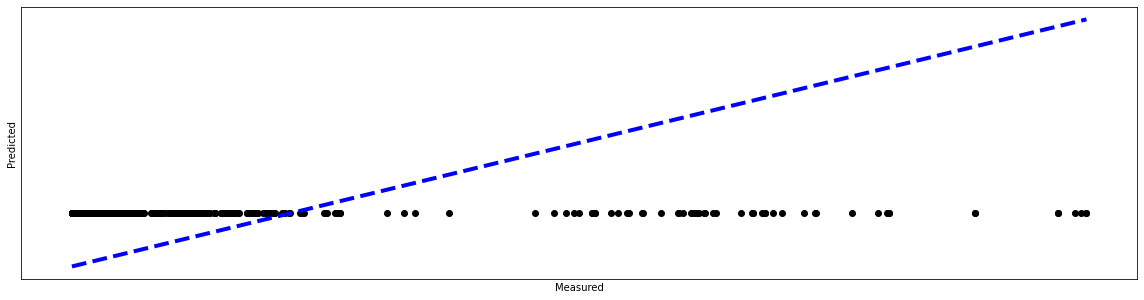

In [180]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

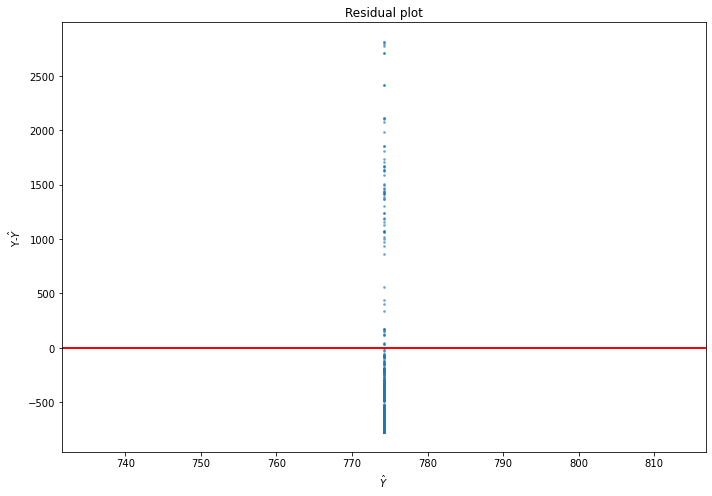

In [181]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [182]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr.pkl')

['regr.pkl']

# NFB Predictions

### 6. Train Test Split

In [183]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split


In [184]:
# Init x, y test,train @ 33% size (sklearn)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)



In [185]:
# Determine linear_model (sklearn - above))
model_regr = linear_model.LinearRegression()


In [186]:
# Train linear_model (sklearn)
model_regr.fit(X_train, y_train)
# The cell itself executes fine;; it is crashing when Run All .. Check if it is due to Win32

LinearRegression()

In [187]:
# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

y_pred = model_regr.predict(X_test)
score = model_regr.score(features, label)
print('Score: %.2f' % score)

# Score Method 2 (sklearn)
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
# Variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference 
# from the predicted value mean. The goal is to have a value that is low. 

Score: -0.00
Variance score: -0.03


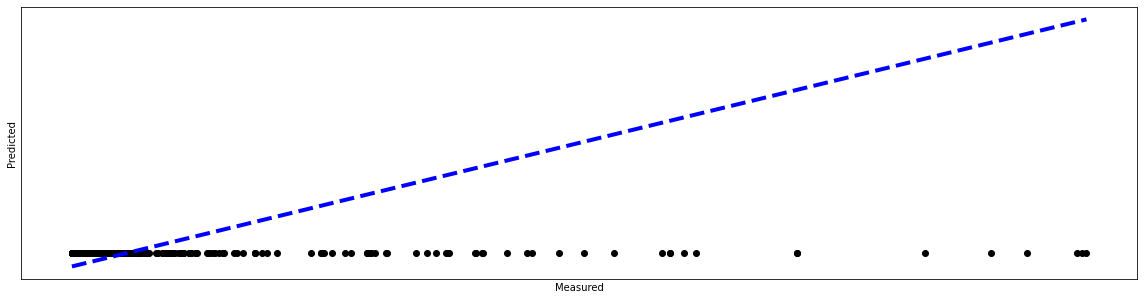

In [188]:
# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

In [189]:
# Download model as pkl file
joblib.dump(regr, 'model_regr.pkl')


['model_regr.pkl']

### 7. Decision Tree

In [190]:
# YOUR TURN
# Run DecisionTreeRegressor
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


# Create regressor
from sklearn.tree import DecisionTreeRegressor

#Init model
model_dtree_regr = DecisionTreeRegressor(random_state=0) # experiement with values: max_depth=5

# Fit
model_dtree_regr.fit(X_train, y_train)

# Predictions
y_dtr_pred = model_dtree_regr.predict(X_test)
print('Decision Tree Regressor Pred: ', y_dtr_pred)


Decision Tree Regressor Pred:  [325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345 325.9095345
 325.9095345 325.909

In [191]:
# Score

score_dtr = model_dtree_regr.score(features, label)
print('Score: %.2f' % score_dtr)

# Score Method 2 (sklearn)
print('Variance score: %.2f' % r2_score(y_test, y_dtr_pred))


Score: -0.00
Variance score: -0.03


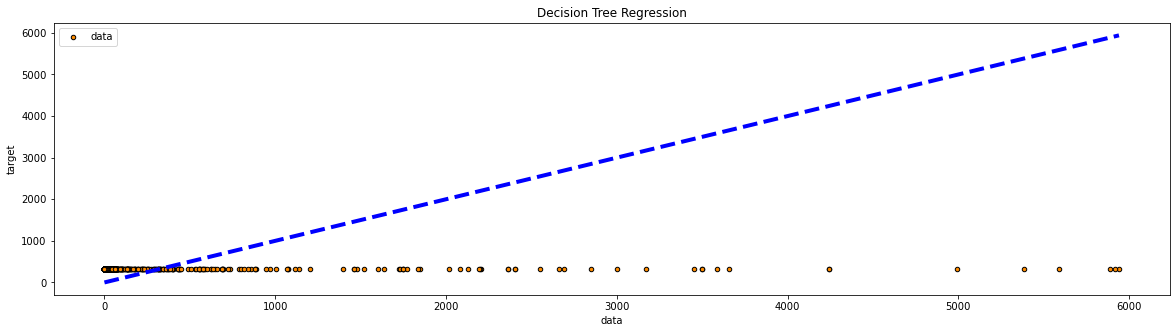

In [192]:
# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_pred, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [150]:
# Download model as pkl file
joblib.dump(model_dtree_regr, 'model_dtree_regr.pkl')


['model_dtree_regr.pkl']

In [210]:
model1 = joblib.load('model_regr.pkl')
model2 = joblib.load('model_dtree_regr.pkl')
#
# Make prediction - features = ['Area_Code', 'Element_Code', 'Item_Code', 'Year_Code']
#
#    Element_Code: 5301(Domestic Suply Quantity); 5911(Export); 5611(Import) ... ))
#    Item_Code: 2511(Wheet); 2616(Plantains); 2602(Onions); 2514(Maize) etc...
years = [2018, 2019, 2021, 2021, 2022]
for y in years:
    pred = model1.predict([[215, 5301, 2511, y]])[0][0].round(2)
    print(pred)
# pred2 = model2.predict([[215, 5301, 2602, 2018]])[0].round(6)
# res = "Linear Regression: "+str(pred1) + "\nDecision Tree Regressor: "+str(pred2)
# print(res)

774.2
774.2
774.2
774.2
774.2


### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame